# Importando bibliotecas importantes

In [1]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

import keras
import numpy as np

In [2]:
%matplotlib notebook 
import matplotlib.pyplot as plt

### Bibliotecas pessoais

In [3]:
from dataHandler import dataHandler

# Carregando dados

In [12]:
data = dataHandler()
data.loadData("dataClean/")

### Codificando labels via One Hot Encoding

In [13]:
data.oneHotEncode()

In [14]:
print("- Foram detectadas %d classes diferentes" % data.getClassCount())

- Foram detectadas 26 classes diferentes


### Obtendo dados
Os dados de treino e teste são divididos durante o carregamento

In [15]:
train_features, test_features = data.getFeatures()
train_labels, test_labels = data.getLabels()

### Visualizando dados

In [16]:
print(train_labels[0])
print(train_labels[1])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]


In [17]:
print(train_features[0][1000:1500])

[216, 255, 255, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 253, 255, 255, 228, 0, 0, 0, 2, 0, 0, 0, 122, 255, 254, 254, 255, 254, 255, 16, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 211, 251, 255, 252, 255, 255, 253, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 248, 255, 232, 0, 2, 0, 0, 1, 2, 0, 120, 255, 255, 255, 254, 239, 68, 12, 0, 1, 0, 0, 2, 1, 0, 0, 1, 2, 0, 1, 66, 228, 253, 255, 255, 254, 254, 255, 253, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 255, 254, 228, 0, 0, 2, 2, 0, 0, 77, 193, 255, 252, 255, 254, 235, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 3, 0, 123, 234, 253, 255, 255, 255, 254, 255, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 

In [18]:
print("- Tamanho do conjunto de treino: %d" % len(train_features))
print("- Tamanho do conjunto de teste: %d" % len(test_features))

- Tamanho do conjunto de treino: 1955
- Tamanho do conjunto de teste: 611


# Criando rede neural

In [19]:
inputShape = len(train_features[0])
numClasses = data.getClassCount()

print("- Tamanho linear dos dados de entrada: %d" % inputShape)

- Tamanho linear dos dados de entrada: 4096


In [50]:
model = keras.Sequential()
model.add(keras.layers.Dense(3500, input_dim=inputShape, activation='selu'))
model.add(keras.layers.Dropout(0.8))
model.add(keras.layers.normalization.BatchNormalization())

model.add(keras.layers.Dense(2000, input_dim=inputShape, activation='selu'))
model.add(keras.layers.normalization.BatchNormalization())
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(1500, input_dim=inputShape, activation='selu'))
model.add(keras.layers.normalization.BatchNormalization())
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(numClasses, activation="softmax"))

In [51]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 2900)              11881300  
_________________________________________________________________
dropout_9 (Dropout)          (None, 2900)              0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 2900)              11600     
_________________________________________________________________
dense_13 (Dense)             (None, 2000)              5802000   
_________________________________________________________________
batch_normalization_10 (Batc (None, 2000)              8000      
_________________________________________________________________
dropout_10 (Dropout)         (None, 2000)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 1500)             

## Compilando modelo

In [52]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinando modelo

In [53]:
history = model.fit(train_features, train_labels, epochs=100, batch_size=128, validation_data=(test_features, test_labels))

Epoch 1/100
16/16 [==============================] - 8s 429ms/step - loss: 4.8181 - accuracy: 0.0341 - val_loss: 5.3785 - val_accuracy: 0.0376
Epoch 2/100
16/16 [==============================] - 1s 32ms/step - loss: 4.7019 - accuracy: 0.0365 - val_loss: 4.6126 - val_accuracy: 0.0589
Epoch 3/100
16/16 [==============================] - 1s 31ms/step - loss: 4.4679 - accuracy: 0.0429 - val_loss: 4.2607 - val_accuracy: 0.0409
Epoch 4/100
16/16 [==============================] - 1s 32ms/step - loss: 4.2855 - accuracy: 0.0460 - val_loss: 4.0241 - val_accuracy: 0.0606
Epoch 5/100
16/16 [==============================] - 1s 32ms/step - loss: 4.2183 - accuracy: 0.0339 - val_loss: 3.9206 - val_accuracy: 0.0704
Epoch 6/100
16/16 [==============================] - 0s 31ms/step - loss: 4.0592 - accuracy: 0.0394 - val_loss: 3.7995 - val_accuracy: 0.0736
Epoch 7/100
16/16 [==============================] - 1s 32ms/step - loss: 3.8896 - accuracy: 0.0561 - val_loss: 3.3402 - val_accuracy: 0.0998
Epoch

16/16 [==============================] - 1s 31ms/step - loss: 2.6664 - accuracy: 0.1675 - val_loss: 2.6823 - val_accuracy: 0.1751
Epoch 59/100
16/16 [==============================] - 0s 31ms/step - loss: 2.6583 - accuracy: 0.1792 - val_loss: 2.7049 - val_accuracy: 0.1751
Epoch 60/100
16/16 [==============================] - 0s 31ms/step - loss: 2.6507 - accuracy: 0.1686 - val_loss: 2.5286 - val_accuracy: 0.2340
Epoch 61/100
16/16 [==============================] - 1s 32ms/step - loss: 2.7342 - accuracy: 0.1630 - val_loss: 2.4951 - val_accuracy: 0.2373
Epoch 62/100
16/16 [==============================] - 0s 31ms/step - loss: 2.7352 - accuracy: 0.1723 - val_loss: 2.7658 - val_accuracy: 0.1571
Epoch 63/100
16/16 [==============================] - 1s 31ms/step - loss: 2.6659 - accuracy: 0.1653 - val_loss: 2.4942 - val_accuracy: 0.2340
Epoch 64/100
16/16 [==============================] - 1s 32ms/step - loss: 2.6779 - accuracy: 0.1665 - val_loss: 2.4801 - val_accuracy: 0.2242
Epoch 65/100

<IPython.core.display.Javascript object>


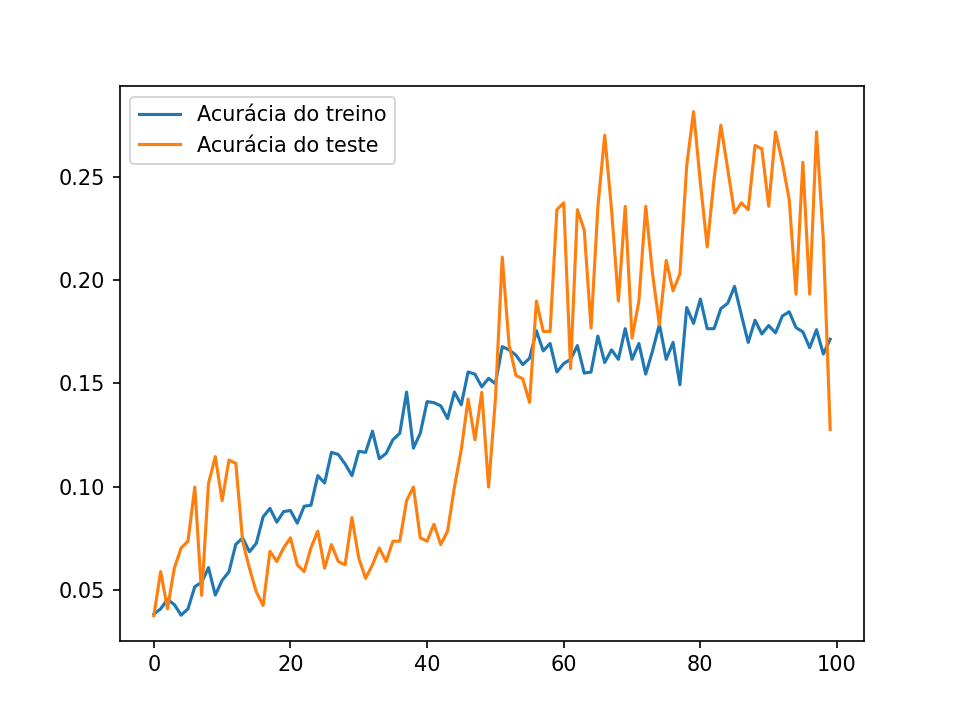

In [54]:
plt.figure()
plt.plot(history.history['accuracy'], label="Acurácia do treino")
plt.plot(history.history['val_accuracy'], label = "Acurácia do teste")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


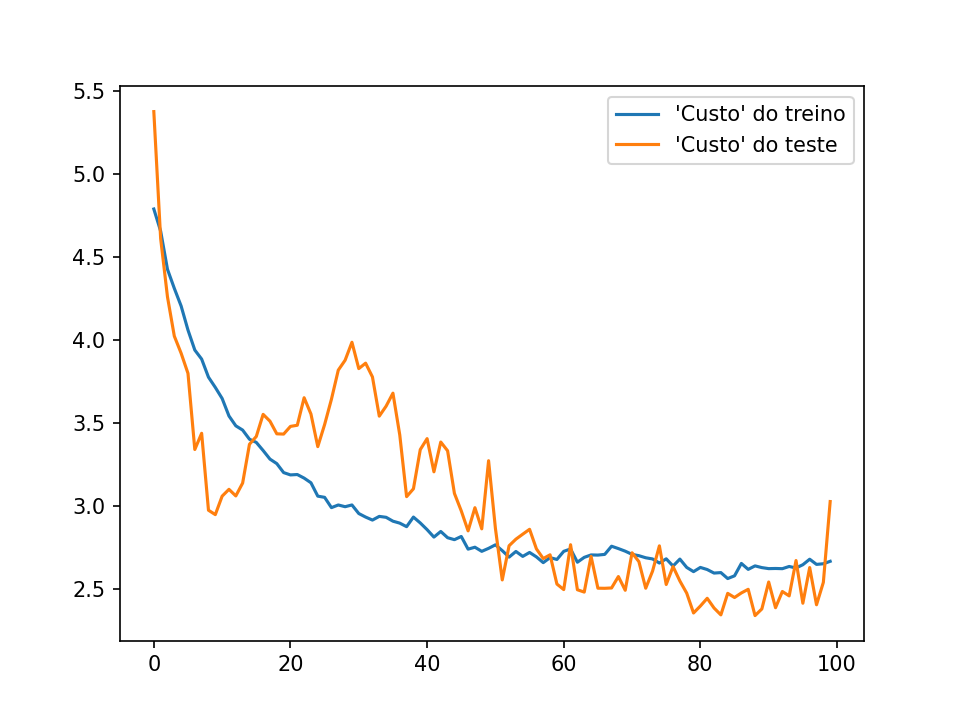

In [55]:
plt.figure()
plt.plot(history.history['loss'], label = "'Custo' do treino")
plt.plot(history.history['val_loss'], label= "'Custo' do teste")
plt.legend()
plt.show()

# Avaliando modelo

In [107]:
_, accuracy = model.evaluate(test_features, test_labels)
print("Acurácia do modelo nos dados de teste: %.2f%%" % (accuracy*100.0))

27/27 [==============================] - 0s 9ms/step - loss: 7.1882 - accuracy: 0.4738
Acurácia do modelo nos dados de teste: 47.38%


# Testando modelo

In [26]:
import cv2

# Função para carregar imagem
def loadImage(fileName, printImg = False):
    # Carrega a imagem e aplica um threshold para ficar igual
    # as imagens do treino
    img = cv2.imread(fileName, cv2.IMREAD_GRAYSCALE)
    _, img = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV) 

    # Ajusta o tamanho da imagem
    img = cv2.resize(img, (64,64))
    
    if printImg:
        plt.figure()
        plt.imshow(img, cmap='gray')
    
    return list(img.flatten().tolist())


def getChar(x):
    label = model.predict([x], batch_size=1)
    
    char = data.oneHotDecode(label)
    
    return char

In [41]:
x = loadImage("testes/letraa.png")
c = getChar(x)
print("O caractere reconhecido foi %s" % c)

O caractere reconhecido foi j


In [42]:
x = loadImage("testes/letraa2.png")
c = getChar(x)
print("O caractere reconhecido foi %s" % c)

O caractere reconhecido foi j


In [43]:
x = loadImage("testes/letraAu.png")
c = getChar(x)
print("O caractere reconhecido foi %s" % c)

O caractere reconhecido foi j


In [44]:
x = loadImage("testes/cidilha.png")
c = getChar(x)
print("O caractere reconhecido foi %s" % c)

O caractere reconhecido foi j


In [45]:
x = loadImage("testes/cidilhau.png")
c = getChar(x)
print("O caractere reconhecido foi %s" % c)

O caractere reconhecido foi o
